In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/MyDrive/datasets/Google_Stock_Price_Train.csv"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from pandas.plotting import autocorrelation_plot
%matplotlib inline

In [4]:
df_google = pd.read_csv(path)

In [5]:
df_google.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
df_google.corr()

<ipython-input-6-fd776cfeeb55>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_google.corr()


,Open,High,Low
Open,1.000000,0.999692,0.999498
High,0.999692,1.000000,0.999480
Low,0.999498,0.999480,1.000000


<ipython-input-7-8f0815cca65f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_google.corr(), annot=True,linecolor='Green', fmt="0.4f",ax=ax)


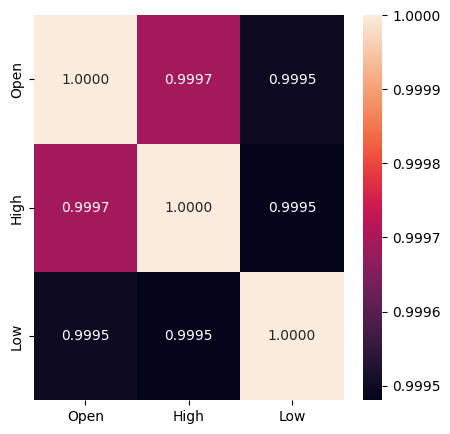

In [7]:
# Visualization of correlation result with seaborn library
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(df_google.corr(), annot=True,linecolor='Green', fmt="0.4f",ax=ax)
plt.show()

In [8]:
# Remove commas from the columns that contain string values
df_google['Close'] = df_google['Close'].str.replace(',', '')

In [9]:
# Convert the column to numeric
df_google['Close'] = pd.to_numeric(df_google['Close'])

In [10]:
df_google.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [11]:
# seprate the open price data from the data frame df_google_tr
data_set = df_google.loc[:,["Close"]]
data_set

,Close
0,663.59
1,666.45
2,657.21
3,648.24
4,620.76
...,...
1253,789.91
1254,791.55
1255,785.05
1256,782.79


In [13]:
# Normalize the sales data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_set.values)

In [14]:
# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [15]:
# Create sequences of length 1 (univariate time series)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [16]:
# Define the sequence length
sequence_length = 1

In [17]:
# Create the training sequences
X_train, y_train = create_sequences(train_data, sequence_length)

In [18]:
# Reshape the input sequences to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [20]:
# Define the RNN model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# Train the RNN model
model.fit(X_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
1005/1005 [==============================] - 4s 3ms/step - loss: 0.0216
Epoch 2/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.0012
Epoch 3/100
1005/1005 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 4/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.0012
Epoch 5/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.0011
Epoch 6/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.0011
Epoch 7/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.0011
Epoch 8/100
1005/1005 [==============================] - 4s 4ms/step - loss: 0.0010
Epoch 9/100
1005/1005 [==============================] - 3s 3ms/step - loss: 0.0010
Epoch 10/100
1005/1005 [==============================] - 2s 2ms/step - loss: 9.6523e-04
Epoch 11/100
1005/1005 [==============================] - 3s 3ms/step - loss: 9.8760e-04
Epoch 12/100
1005/1005 [==============================] - 2s 2ms/s

In [22]:
# Prepare the testing data
inputs = data_set[len(data_set) - len(test_data) - sequence_length:].values
inputs = scaler.transform(inputs)
X_test, y_test = create_sequences(inputs, sequence_length)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
# Make predictions using the trained model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 0s 3ms/step


In [24]:
# Calculate the root mean squared error (RMSE) for predictions
rmse = np.sqrt(np.mean((predictions - data_set[-len(predictions):].values) ** 2))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 9.312066025698455


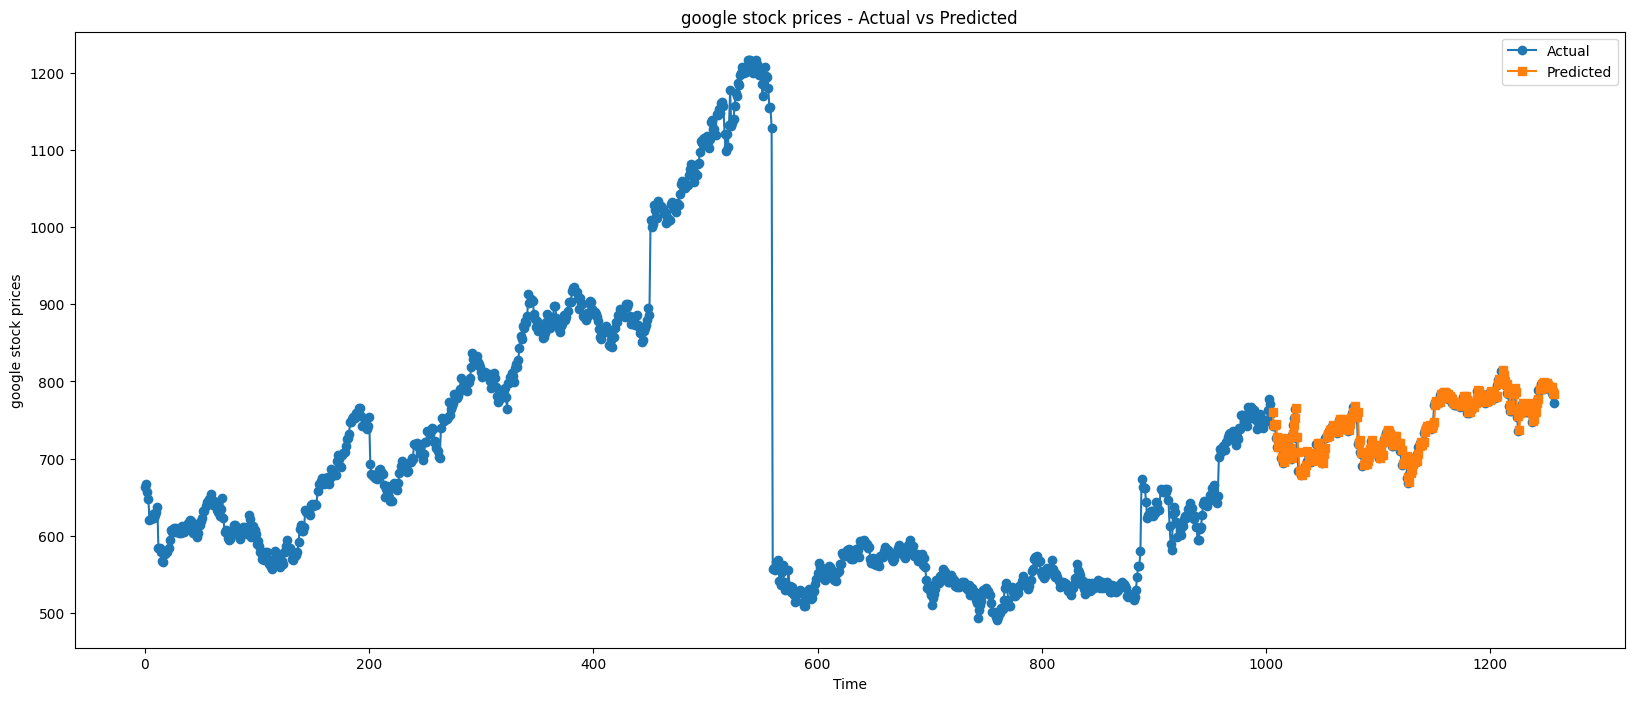

In [25]:
# Visualize the predicted sales
plt.figure(figsize=(20, 8))
plt.plot(df_google.index, df_google['Close'], marker='o', label='Actual')
plt.plot(df_google.index[-len(predictions):], predictions, marker='s', label='Predicted')
plt.xlabel('Time')
plt.ylabel('google stock prices')
plt.title('google stock prices - Actual vs Predicted')
plt.legend()
plt.show()